# 3- EDA - Part 2

Now that we have all features converted to integers and new columns transformed, we can re-run the EDA to get more or new insights

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## to change cientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("datasets/TrainFeatureEngined.csv")

In [3]:
df.head()

,Category,Rating,Reviews,Type,Content Rating,Genres,SizeNew,InstallsNew,PriceNew,LastUpdatedNewYear,LastUpdatedNewMonth,LastUpdatedNewDay,AndroidVerNew,ReviewGroupNew
0,TRAVEL_AND_LOCAL,1.000,149723,0,Everyone,Travel & Local,0.041,10000000,0.000,2018,6,13,4.000,3
1,LIFESTYLE,0.000,853,0,Everyone,Lifestyle,0.340,100000,0.000,2018,3,22,4.100,1
2,FOOD_AND_DRINK,1.000,61881,0,Everyone,Food & Drink,0.372,5000000,0.000,2018,4,10,3.832,3
3,TOOLS,0.000,21943,0,Everyone,Tools,0.023,5000000,0.000,2016,10,19,2.300,2
4,FAMILY,1.000,6,0,Everyone,Education,0.092,1000,0.000,2018,1,24,4.100,0


In [4]:
df.shape

(5788, 14)

## EDAs content

1. Initial descriptions. Unique values on each categorical feature. Histograms, distributions of all columns
2. Correlation matrix with price (target var)
3. Plotting scatterplots

### 1. Initial descriptions. Unique values on each categorical feature. Histograms, distributions of all columns

In [5]:
## To see the data types
df.dtypes

Category                object
Rating                 float64
Reviews                  int64
Type                     int64
Content Rating          object
Genres                  object
SizeNew                float64
InstallsNew              int64
PriceNew               float64
LastUpdatedNewYear       int64
LastUpdatedNewMonth      int64
LastUpdatedNewDay        int64
AndroidVerNew          float64
ReviewGroupNew           int64
dtype: object

In [6]:
## to get a data visual
df.describe()

,Rating,Reviews,Type,SizeNew,InstallsNew,PriceNew,LastUpdatedNewYear,LastUpdatedNewMonth,LastUpdatedNewDay,AndroidVerNew,ReviewGroupNew
count,5788.000,5788.000,5788.000,5788.000,5788.000,5788.000,5788.000,5788.000,5788.000,5788.000,5788.000
mean,0.746,234145.160,0.080,0.372,7770270.321,1.023,2017.332,6.355,15.663,3.832,1.502
std,0.435,2174468.934,0.272,0.981,54031304.351,15.457,1.165,2.668,9.454,0.829,1.116
min,0.000,0.000,0.000,0.010,0.000,0.000,2010.000,1.000,1.000,1.000,0.000
25%,0.000,23.000,0.000,0.060,1000.000,0.000,2017.000,5.000,6.000,3.832,1.000
50%,1.000,889.000,0.000,0.170,100000.000,0.000,2018.000,7.000,16.000,4.000,2.000
75%,1.000,26432.500,0.000,0.372,1000000.000,0.000,2018.000,8.000,24.000,4.100,2.250
max,1.000,78158306.000,1.000,9.940,1000000000.000,399.990,2018.000,12.000,31.000,8.000,3.000


In [7]:
## to explore nulls
df.isnull().sum()

Category               0
Rating                 0
Reviews                0
Type                   0
Content Rating         0
Genres                 0
SizeNew                0
InstallsNew            0
PriceNew               0
LastUpdatedNewYear     0
LastUpdatedNewMonth    0
LastUpdatedNewDay      0
AndroidVerNew          0
ReviewGroupNew         0
dtype: int64

In [8]:
## to explore nulls
df.nunique()

Category                 33
Rating                    2
Reviews                3367
Type                      2
Content Rating            6
Genres                  107
SizeNew                 332
InstallsNew              20
PriceNew                 68
LastUpdatedNewYear        9
LastUpdatedNewMonth      12
LastUpdatedNewDay        31
AndroidVerNew            22
ReviewGroupNew            4
dtype: int64

## Value counts graphs

This is usefull for low cardinal variables

In [9]:
def value_counts_graphs(df, column_names):
    for column_name in column_names:
        index_num = column_names.index(column_name)+1
        label_freq = df[column_name].value_counts() / len(df)
        plotting = label_freq.sort_values(ascending=False).plot.bar()
        print(label_freq)
        plt.show()

1.000   0.746
0.000   0.254
Name: Rating, dtype: float64


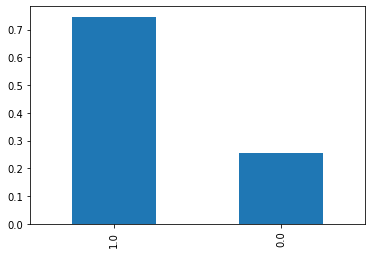

0   0.920
1   0.080
Name: Type, dtype: float64


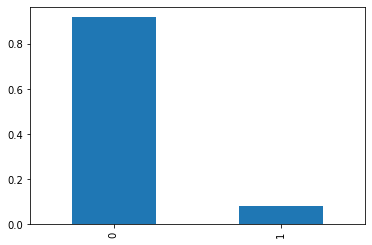

1000000      0.145
100000       0.114
10000        0.108
10000000     0.093
1000         0.093
100          0.077
5000000      0.062
500000       0.053
50000        0.051
5000         0.049
10           0.041
500          0.033
50           0.021
50000000     0.020
100000000    0.020
5            0.007
1            0.006
500000000    0.003
1000000000   0.002
0            0.001
Name: InstallsNew, dtype: float64


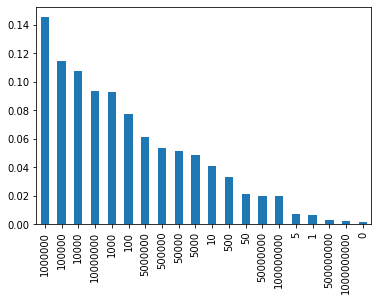

0.000     0.920
0.990     0.016
2.990     0.012
4.990     0.009
1.990     0.008
           ... 
1.760     0.000
3.950     0.000
9.000     0.000
3.040     0.000
154.990   0.000
Name: PriceNew, Length: 68, dtype: float64


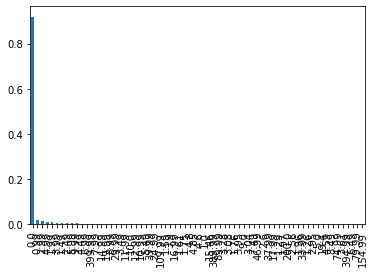

2018   0.649
2017   0.184
2016   0.079
2015   0.048
2014   0.022
2013   0.012
2012   0.003
2011   0.002
2010   0.000
Name: LastUpdatedNewYear, dtype: float64


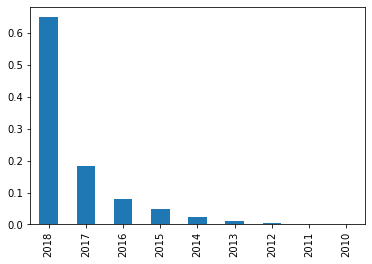

7    0.268
8    0.136
6    0.115
5    0.100
3    0.068
4    0.061
2    0.055
1    0.047
12   0.045
10   0.038
11   0.036
9    0.030
Name: LastUpdatedNewMonth, dtype: float64


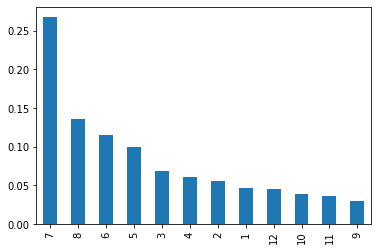

3    0.051
2    0.046
6    0.043
1    0.043
30   0.040
26   0.040
23   0.040
25   0.038
27   0.036
5    0.035
31   0.034
4    0.033
12   0.033
20   0.033
24   0.031
17   0.031
18   0.030
19   0.030
9    0.030
16   0.029
21   0.028
11   0.027
28   0.027
13   0.027
22   0.026
7    0.026
15   0.025
29   0.025
10   0.022
8    0.022
14   0.020
Name: LastUpdatedNewDay, dtype: float64


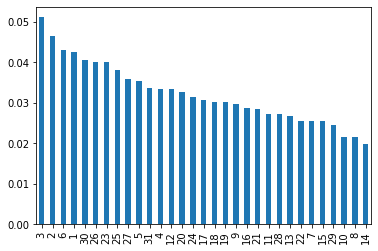

4.000   0.278
4.100   0.228
3.832   0.101
4.400   0.084
2.300   0.066
5.000   0.054
4.200   0.039
2.000   0.032
4.300   0.025
2.200   0.025
3.000   0.024
2.100   0.015
1.600   0.011
6.000   0.005
7.000   0.004
3.200   0.003
5.100   0.003
1.500   0.002
3.100   0.001
8.000   0.001
7.100   0.001
1.000   0.000
Name: AndroidVerNew, dtype: float64


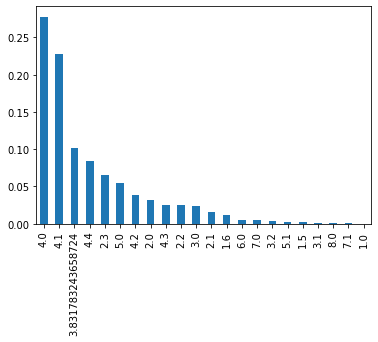

1   0.252
2   0.250
3   0.250
0   0.248
Name: ReviewGroupNew, dtype: float64


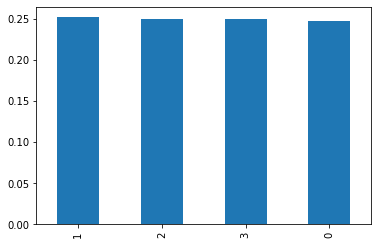

In [10]:
value_counts_graphs(df, ['Rating', 'Type', 'InstallsNew', 'PriceNew', 'LastUpdatedNewYear', 
                         'LastUpdatedNewMonth', 'LastUpdatedNewDay', 'AndroidVerNew', 'ReviewGroupNew'])

### Graph Outliers

In [11]:
def outliers_graph(df, column_names):
    for column_name in column_names:
        df[column_name].plot.box()
        plt.show()

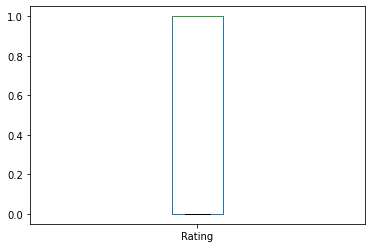

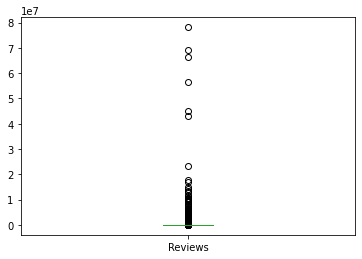

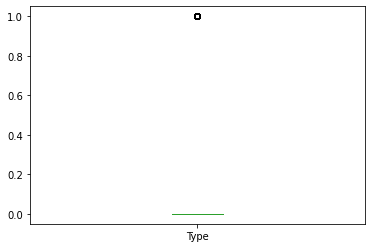

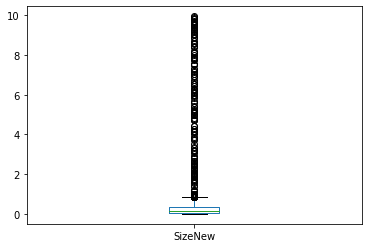

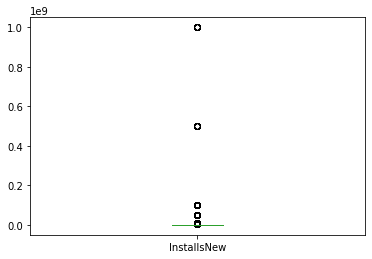

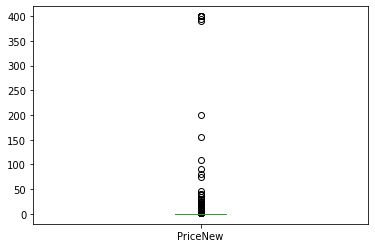

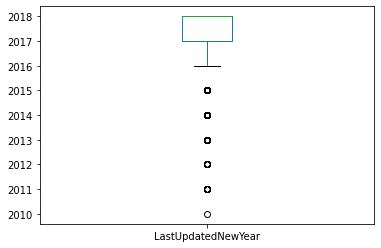

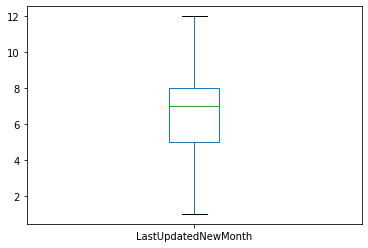

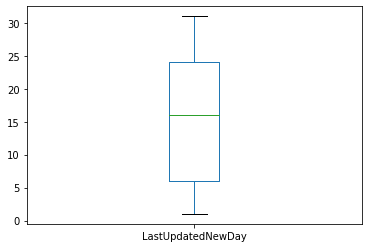

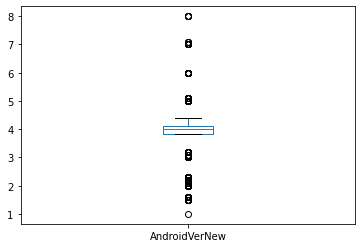

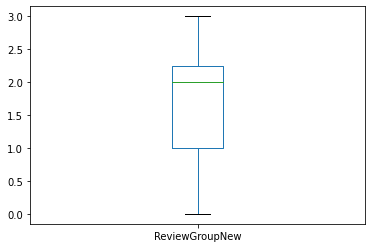

In [12]:
outliers_graph(df, ["Rating", "Reviews", "Type", "SizeNew", "InstallsNew", "PriceNew", 
                   "LastUpdatedNewYear", "LastUpdatedNewMonth", "LastUpdatedNewDay", 
                    "AndroidVerNew", "ReviewGroupNew"])

### Graph Histograms

In [13]:
## to plot hist to all dataframe
def hist_graph(df, column_names):
    for column_name in column_names:
        df[column_name].hist(bins=30, figsize=(6,6), density=True)
        plt.title(column_name)
        plt.show()

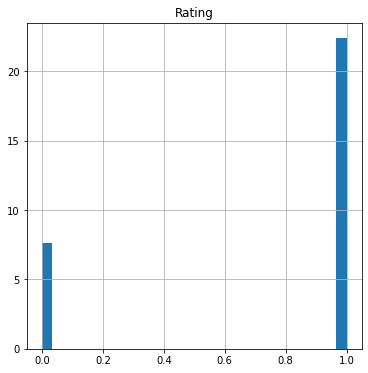

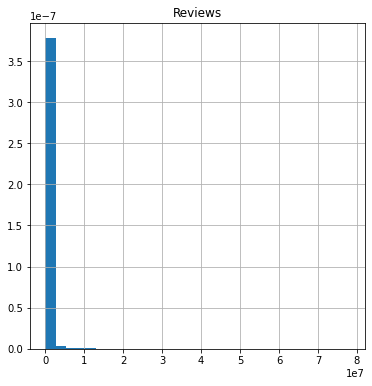

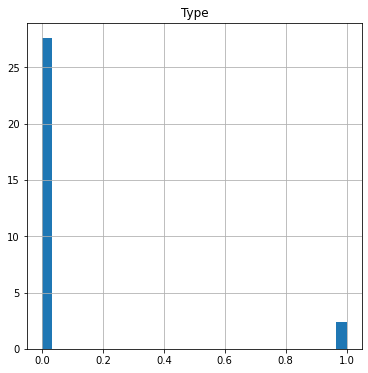

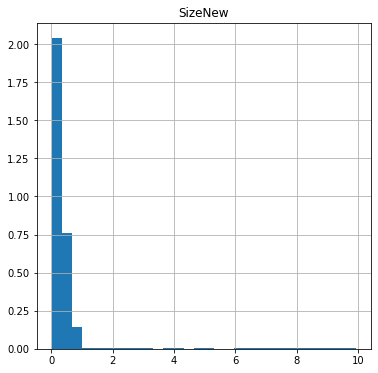

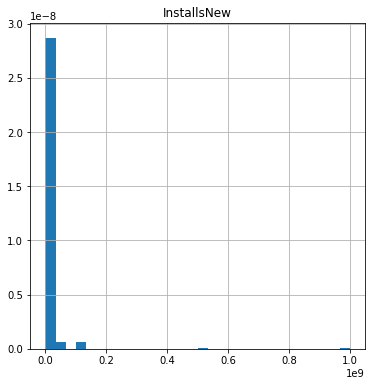

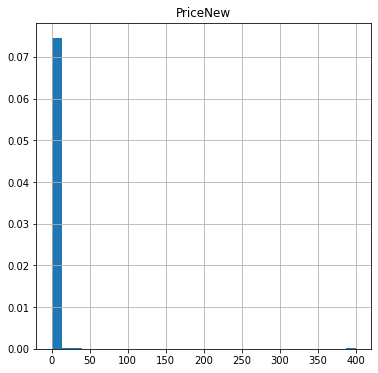

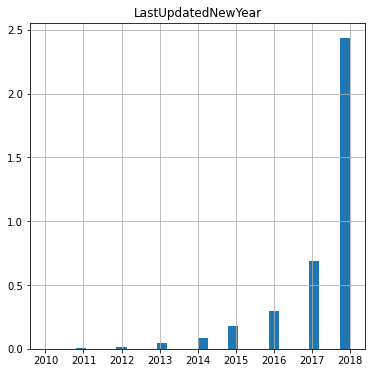

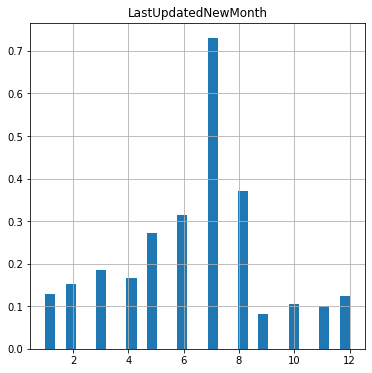

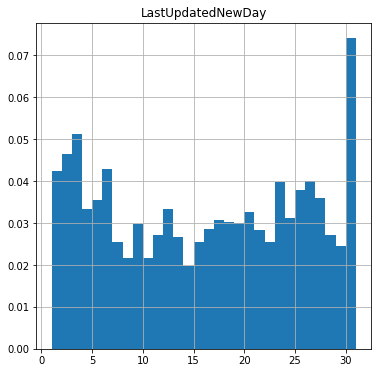

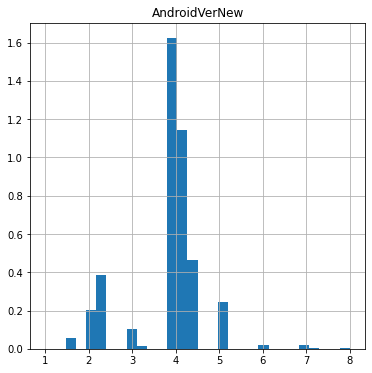

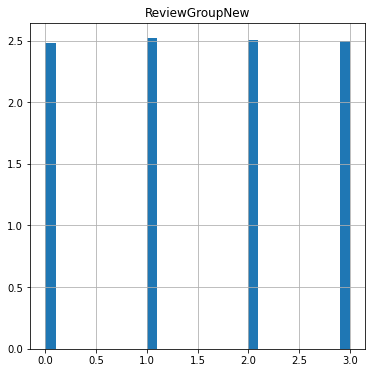

In [14]:
hist_graph(df, ["Rating", "Reviews", "Type", "SizeNew", "InstallsNew", "PriceNew", 
                   "LastUpdatedNewYear", "LastUpdatedNewMonth", "LastUpdatedNewDay", 
                    "AndroidVerNew", "ReviewGroupNew"])

### Correlation matrix with price (target var)

In [15]:
## to plot hist to all dataframe
def corr_matrix(df, column_names):
    corr = df[column_names].corr()
    plt.figure(figsize=(15,8))

    sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,annot=True)

    corr

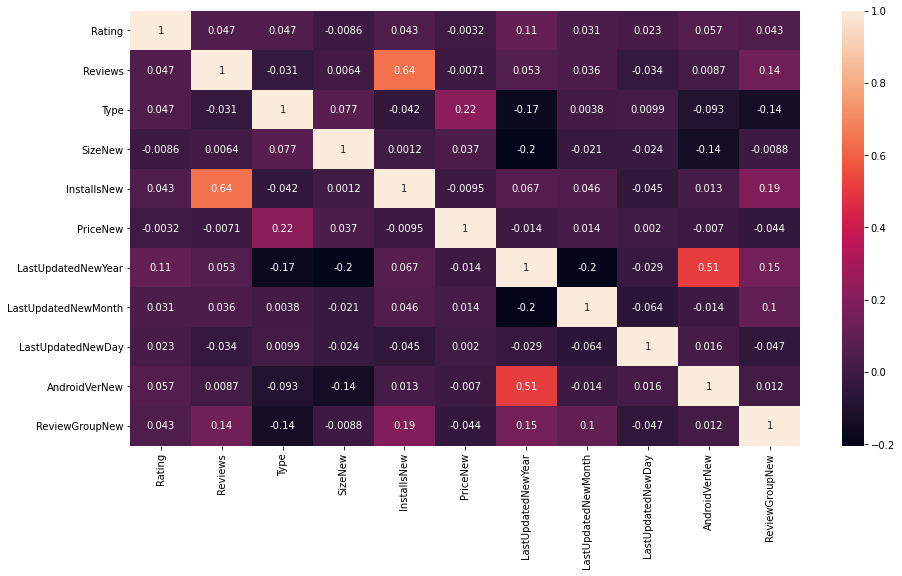

In [16]:
corr_matrix(df, ["Rating", "Reviews", "Type", "SizeNew", "InstallsNew", "PriceNew", 
                   "LastUpdatedNewYear", "LastUpdatedNewMonth", "LastUpdatedNewDay", 
                    "AndroidVerNew", "ReviewGroupNew"])

### Plotting scatterplots with target

In [17]:
def scatter_plot_target(column_names, target):
    for column_name in column_names:
        plt.scatter(df[column_name], df[target])
        plt.title(column_name)
        plt.show()

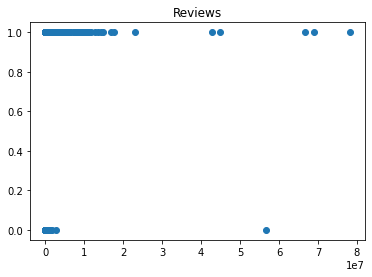

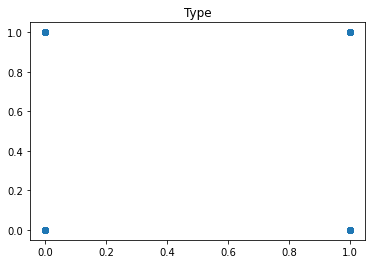

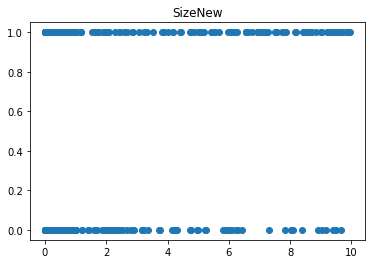

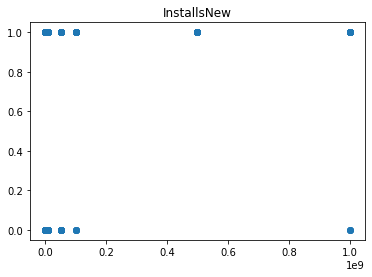

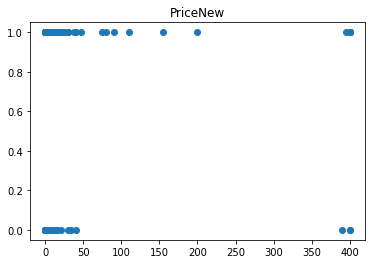

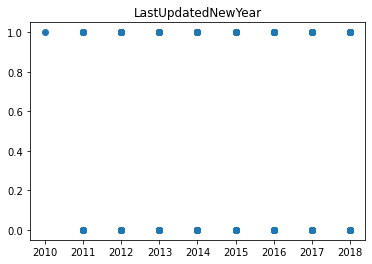

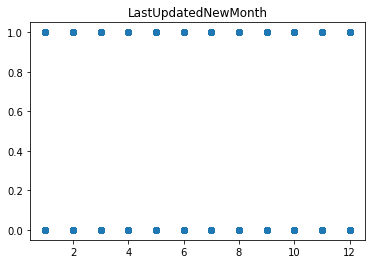

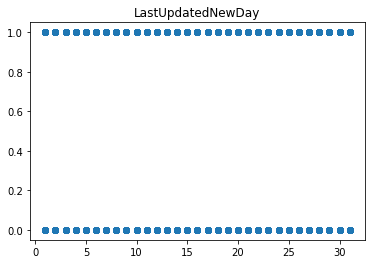

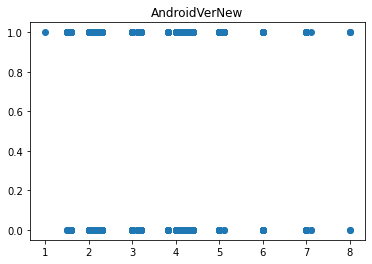

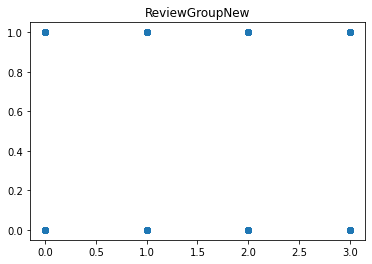

In [18]:
scatter_plot_target(["Reviews", "Type", "SizeNew", "InstallsNew", "PriceNew", 
                   "LastUpdatedNewYear", "LastUpdatedNewMonth", "LastUpdatedNewDay", 
                    "AndroidVerNew", "ReviewGroupNew"], "Rating")